In [7]:
from GlobalModel import GlobalModel
import Reactions_H as R
import matplotlib.pyplot as plt
import numpy as np

me=9.11e-31
mp=1.67e-27
q=1.6e-19

def style (i):
    color_list=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','black']
    marker_list=['-','--','-.',':']
    k,j=np.divmod(i,len(color_list))
    return color_list[j],marker_list[k]

In [8]:
'''Se crea un objeto de la clase GlobalModel'''
reactions=R.reactions1
gm=GlobalModel(reactions,[2*mp,0],gamma=0.1,R=3.1,L=10,Ti=0.3,Tg=700)

(0.31622776601683794, 1000.0)

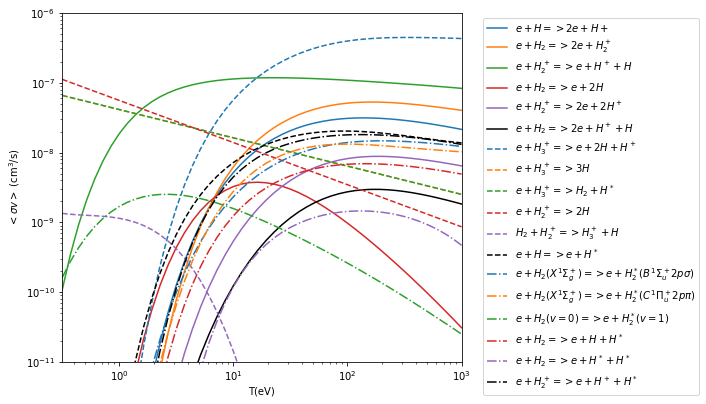

In [9]:
'''Las tasas de reaccion de las reacciones de volumen'''
figure=plt.figure(figsize=(10,6))
elog=np.logspace(-0.5,3)
for i in range (len(reactions)):
    color,marker=style(i)
    r=reactions[i]
    if (r[1]!='surface'):
        plt.plot(elog,r[5](elog),color=color,linestyle=marker,label=r[0])
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-11,1e-6)
plt.xlabel('T(eV)')
plt.ylabel('$<\sigma v>$ (cm$^{3}$/s)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()
plt.xlim([10**-0.5,1e3])

Text(0.5, 0, '$P_\\mu$ (Wm$^{-3}$)')

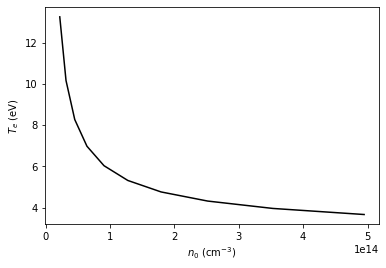

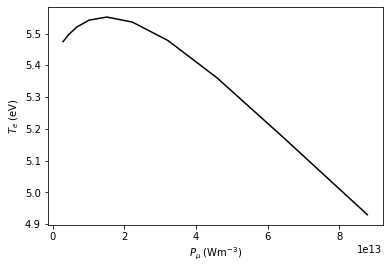

In [10]:
'''Temperatura de los electrones en un barrido de densidad de gas neutro'''
plt.figure()
p0=5e5
nmin,nmax=2e13,4.5e14
N=10
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p0,nmin,nmax,N,'log')
ng=nH+nH2
plt.plot(ng,e,label='P$_\mu$=1e5 W/m$^{3}$',c='black',linestyle='-')
plt.ylabel('$T_e$ (eV)')
plt.xlabel('$n_0$ (cm$^{-3}$)')



'''Temperatura de los electrones en un barrido de densidad de potencia'''
plt.figure()
n0=1e14
pmin,pmax=1e5,5e6
N=10
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n0,pmin,pmax,N,'log')
ng=nH+nH2
plt.plot(ng,e,label='P$_\mu$=1e5 W/m$^{3}$',c='black',linestyle='-')
plt.ylabel('$T_e$ (eV)')
plt.xlabel('$P_\mu$ (Wm$^{-3}$)')

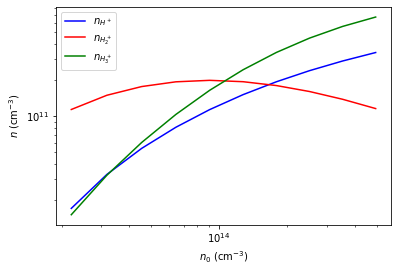

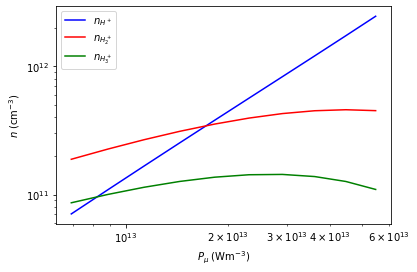

In [11]:
'''Especies ionicas en un barrido de densidad de gas neutro'''
plt.figure()
nmin,nmax=2e13,4.5e14
p0=5e5
N=10
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_n_sweep(p0,nmin,nmax,N,'log')
ng=nH+nH2
plt.plot(ng,n1,color='blue',label='$n_{H^+}$')
plt.plot(ng,n2,color='red',label='$n_{H_2^+}$')
plt.plot(ng,n3,color='green',label='$n_{H_3^+}$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$n$ (cm$^{-3}$)')
plt.xlabel('$n_0$ (cm$^{-3}$)')
plt.legend()


'''Especies ionicas en un barrido de densidad de gas neutro'''
plt.figure()
pmin,pmax=5e5,5e6
n0=5e13
N=10
nH2,[ne,nH,n1,n2,n3,e]=gm.Find_solution_p_sweep(n0,pmin,pmax,N,'log')
ng=nH+nH2
plt.plot(ng,n1,color='blue',label='$n_{H^+}$')
plt.plot(ng,n2,color='red',label='$n_{H_2^+}$')
plt.plot(ng,n3,color='green',label='$n_{H_3^+}$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$n$ (cm$^{-3}$)')
plt.xlabel('$P_\mu$ (Wm$^{-3}$)')
plt.legend()

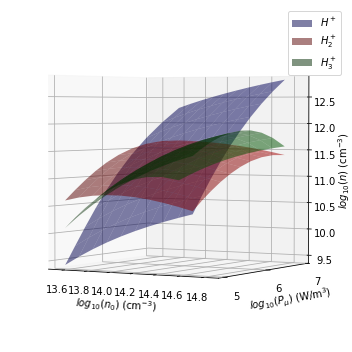

In [12]:
'''Especies ionicas en 3D'''
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['legend.fontsize'] = 10


pmin,pmax=1e5,5e6
nmin,nmax=3.5e13,4.5e14
Nn,Np=10,10
nn,pp,[ne,nH,n1,n2,n3,e]=gm.Find_solution_2D_sweep(pmin,pmax,nmin,nmax,Np,Nn,scale='log')
nn=nn+nH

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf1=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(n1),alpha=0.5,color='blue',label='$H^+$')
surf2=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(n2),alpha=0.5,color='red',label='$H_2^+$')
surf3=ax.plot_surface(np.log10(nn),np.log10(pp),np.log10(n3),alpha=0.5,color='green',label='$H_3^+$')
surf1._facecolors2d = surf1._facecolors3d
surf2._facecolors2d = surf2._facecolors3d
surf3._facecolors2d = surf3._facecolors3d
surf1._edgecolors2d = surf1._edgecolors3d
surf2._edgecolors2d = surf2._edgecolors3d
surf3._edgecolors2d = surf3._edgecolors3d
plt.yticks([5,6,7])
plt.xlabel('$log_{10}(n_0)$ (cm$^{-3}$)')
plt.ylabel('$log_{10}(P_\mu)$ (W/m$^{3}$)')
ax.set_zlabel('$log_{10}(n)$ (cm$^{-3}$)')
ax.view_init(elev=2, azim=-60)
plt.legend()
plt.tight_layout()

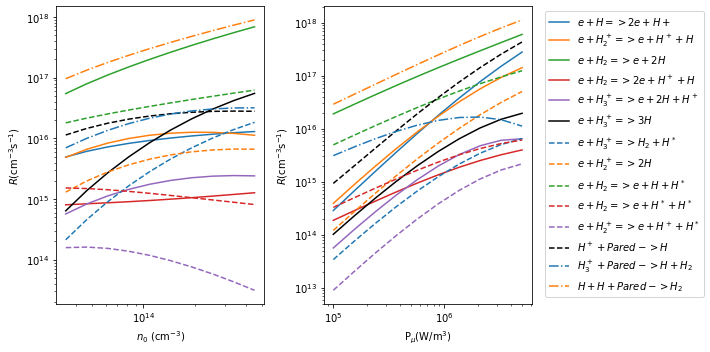

In [13]:
'''Contribucion de cada reaccion para la generacion de hidrogeno. Para elegir otra especie cambiar  'specie' '''
fig,ax=plt.subplots(1,2,figsize=(10,5))
specie=[mp,0]
ps,names0,values0=gm.Contributions_p_sweep(specie,n0,pmin,pmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[1].plot(ps,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ns,names0,values0=gm.Contributions_n_sweep(specie,p0,nmin,nmax,N,'log')
for i in range (values0[0,:].size):
    color,marker=style(i)
    ax[0].plot(ns,abs(values0[:,i]),color=color,linestyle=marker,label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('$R$(cm$^{-3}$s$^{-1}$)')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].set_xscale('log')
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()

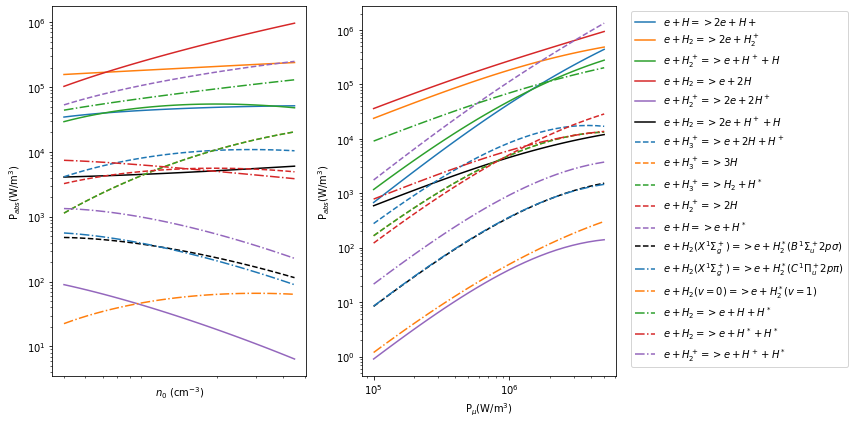

In [14]:
'''Absorcion de potencia'''
p0=1e6
nmin,nmax=4e13,4.5e14
n0=1e14
pmin,pmax=1e5,5e6
N=30
'''
___________________________________________________________________________
'''
fig,ax=plt.subplots(1,2,figsize=(12,6))
ns,names0,values0=gm.Absortion_n_sweep(p0,nmin,nmax,N,'log')
ps,names1,values1=gm.Absortion_p_sweep(n0,pmin,pmax,N,'log')
for i in range(len(names0)):
    color,marker=style(i)
    ax[1].plot(ps,values1[:,i],color=color,linestyle=marker,label=names0[i])
for i in range(len(names0)):
    color,marker=style(i)
    ax[0].plot(ns,values0[:,i],color=color,linestyle=marker,label=names0[i])
ax[1].set_xlabel('P$_\mu$(W/m$^3$)')
ax[1].set_ylabel('P$_{abs}$(W/m$^3$)')
ax[0].set_xlabel('$n_0$ (cm$^{-3}$)')
ax[0].set_ylabel('P$_{abs}$(W/m$^3$)')
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].set_xscale('log')
ax[0].set_xticks([])
ax[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()